### Logistic Regression assignment

#### Problem statement
According to the survey conducted by the Redbook maegazine in 1974 on womens, in which married women were asked about their participation in extramarital affairs.Predict the in which situation the woman interest in extramartial relationship.

Dataset:
* rate_marriage: woman's rating of her marriage (1 = very poor, 5 =
very good)
* age: woman's age
* yrs_married: number of years married
* children: number of children
* religious: woman's rating of how religious she is (1 = not religious, 4 =
strongly religious)
* educ: level of education (9 = grade school, 12 = high school, 14 =
some college, 16 = college graduate, 17 = some graduate school, 20
= advanced degree)

* occupation: woman's occupation (1 = student, 2 = farming/semi-skilled/unskilled, 3 = "white collar", 4 =
teacher/nurse/writer/technician/skilled, 5 = managerial/business, 6 =professional with advanced degree)
* occupation_husb: husband's occupation (same coding as above)
* affairs: time spent in extra-marital affairs

__What is Logistic Regression__?

Logistic Regression is the most fundamental machine learning classification problem.

Logistic regression is an supervised machine learning technique which is used for the classification problem. It predicts a probability of the values belong's to a specific class.If the probability of the class more than 50% , it assigns the value belongs to the particular class else the below 50% of probability assigns the other class based on the threshold. Therefore we can say logistic regression is a binary classifier.


In [1]:
#import the libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import stats
pd.pandas.set_option('display.max_columns',None)
import statsmodels.api as sm
from patsy import dmatrices

In [2]:
#load the data
df=sm.datasets.fair.load_pandas().data
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [3]:
#add a columns 'affair' , 1 which represents the woman having affairs , 0 is not
df['affair']=(df['affairs']>0).astype(int)

In [4]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [5]:
#drop the affairs column
df.drop('affairs',1,inplace=True)

In [6]:
#Check how many observations and variables in the data
print('No of observations: ',df.shape[0])
print('No of variable: ',df.shape[1])

No of observations:  6366
No of variable:  9


In [7]:
#Chech the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   float64
 5   educ             6366 non-null   float64
 6   occupation       6366 non-null   float64
 7   occupation_husb  6366 non-null   float64
 8   affair           6366 non-null   int32  
dtypes: float64(8), int32(1)
memory usage: 422.9 KB


In [8]:
#Get the descriptive and stastical info of the data
df.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.322495
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,0.467468
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,1.000000
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,1.000000


In [9]:
#Check any null values are present in the data
df.isnull().sum()

rate_marriage      0
age                0
yrs_married        0
children           0
religious          0
educ               0
occupation         0
occupation_husb    0
affair             0
dtype: int64

Here we can see that no missing value are present in the data we don't worry about feature engineering

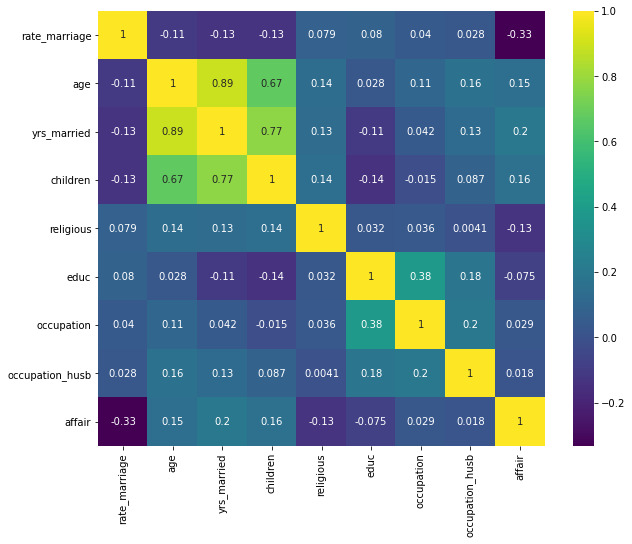

In [10]:
#Display the correlation with the heatmap
plt.figure(figsize=(10,8))
ax=sns.heatmap(df.corr(),annot=True,cmap='viridis')
plt.show()


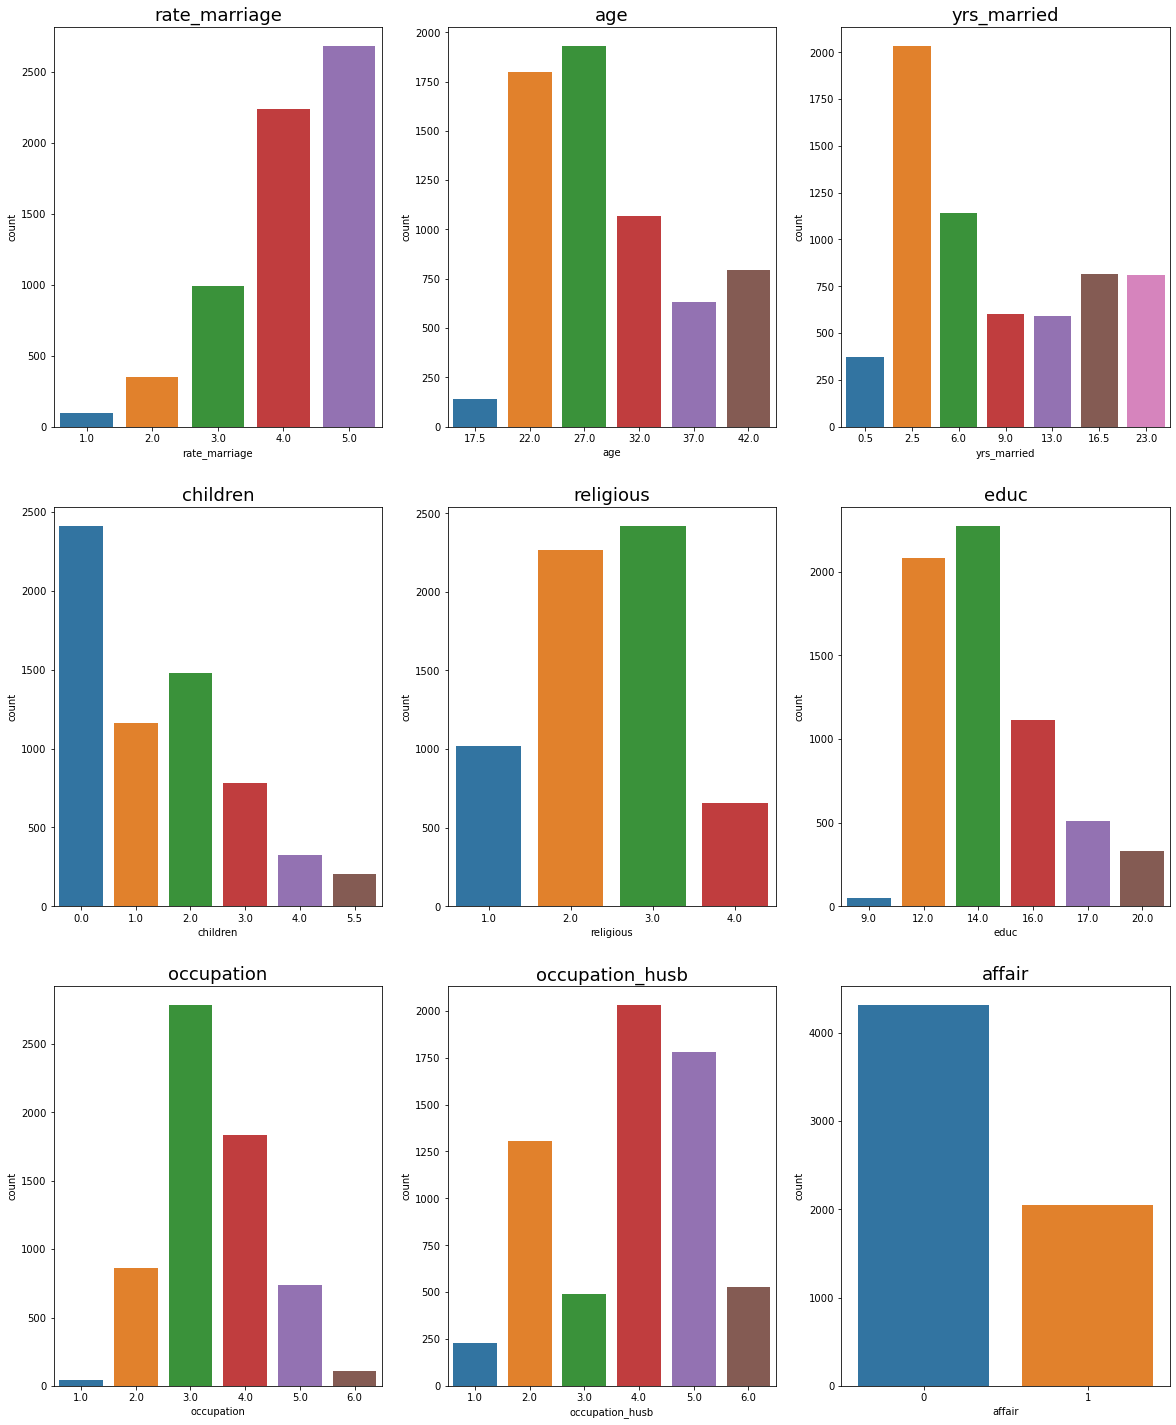

In [11]:
#Chech distributions of the variables in the data
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for i in df.columns:
    if plotnumber <= 9:
        ax=plt.subplot(3,3,plotnumber)
        sns.countplot(df[i])
        plt.title(i,fontsize=18)
        plt.xlabel(i)
    plotnumber+=1
plt.show()

In [12]:
#Check the relationships of each variable with the target data
def rela_plot(data,variable):
    plt.style.use('fivethirtyeight')
    ax=pd.crosstab(data[variable],data['affair'])
    ax.div(ax.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(9,6))
    plt.title(variable.capitalize()+' vs Affair',fontsize=18)
    plt.show()

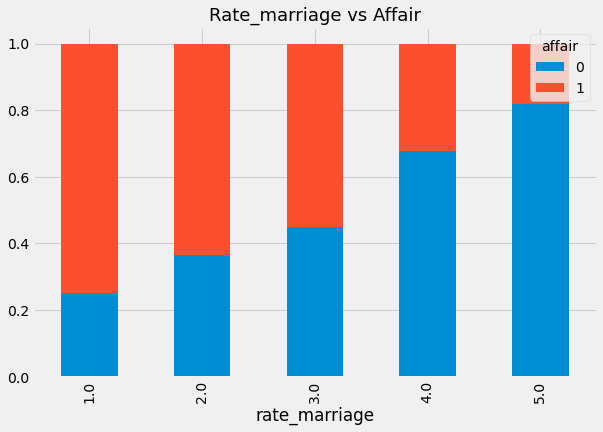

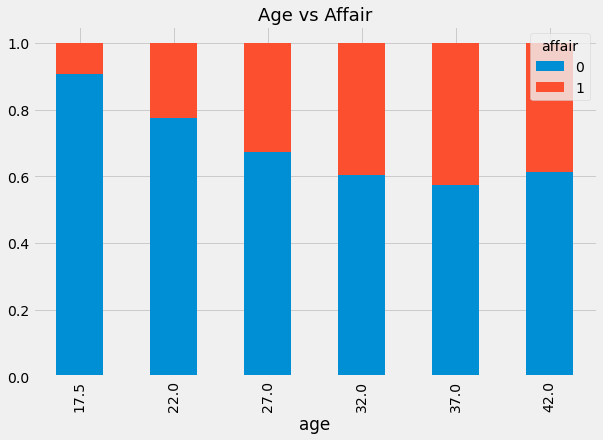

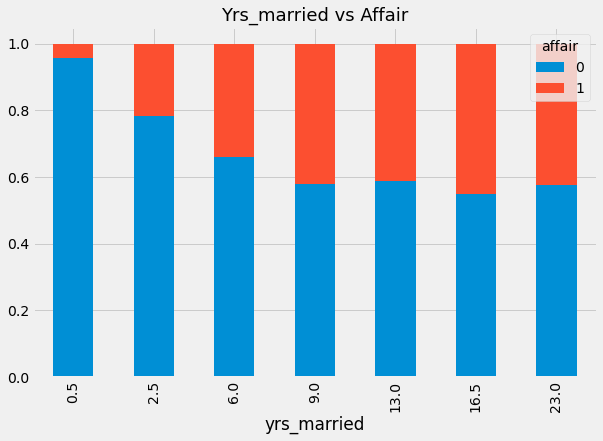

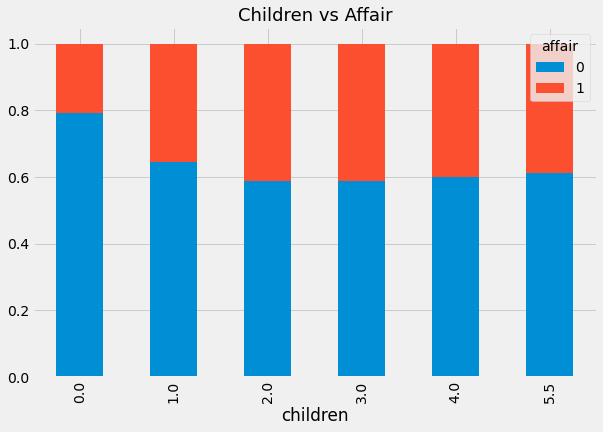

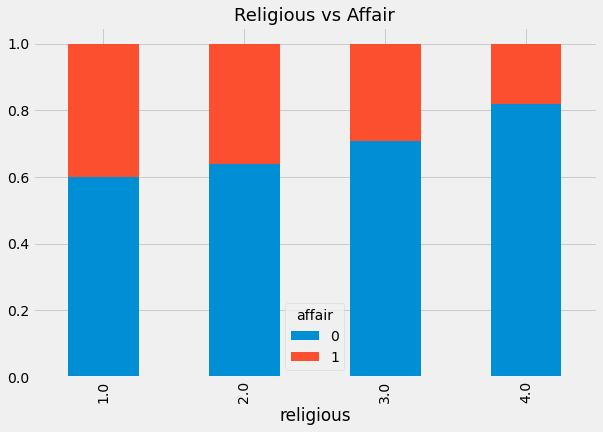

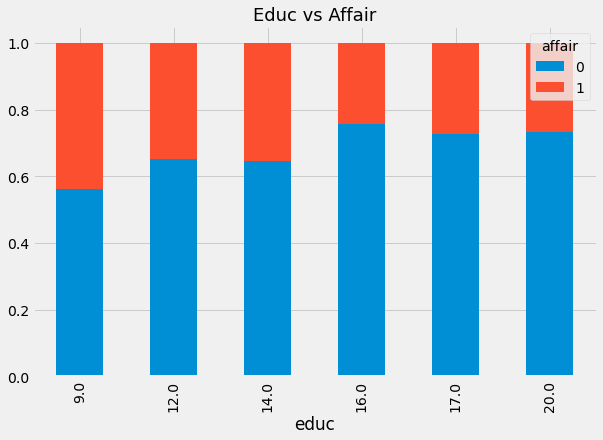

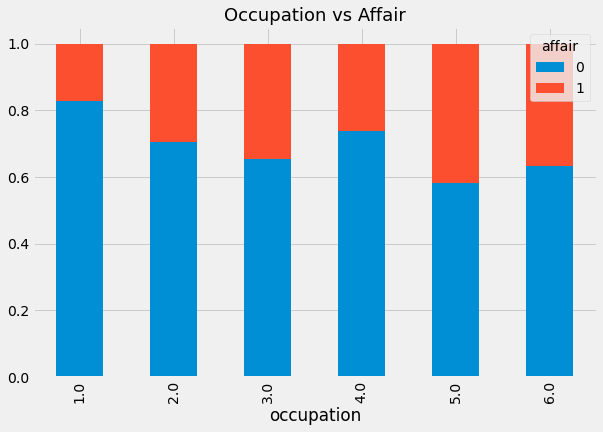

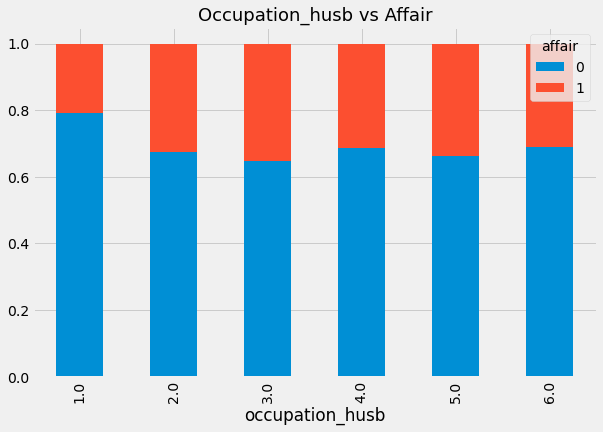

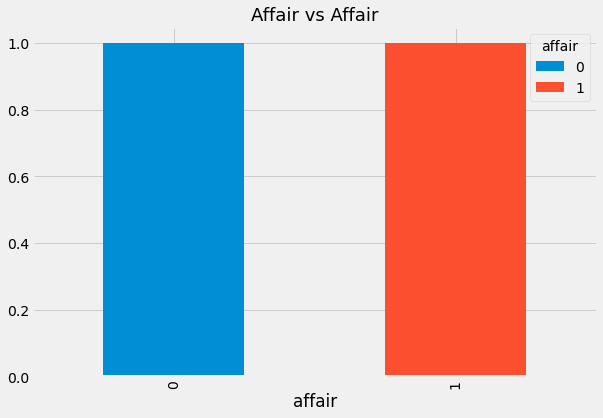

In [13]:
for i in df.columns:
    rela_plot(df,i)

In [14]:
#map the education 
educ={9.0:1,12.0:2,14.0:3,16.0:4,17.0:5,20.0:6}
df['educ']=df['educ'].map(educ)

In [15]:
#Change the occupation columns in to 
occu={1.0:'Student',2.0:'Farm',3.0:'White_collar',4.0:'teacher',5.0:'Bussiness',6.0:'Proffesional'}
df['occupation']=df['occupation'].map(occu)

In [16]:
cov=pd.get_dummies(df['occupation'],drop_first=True)
df_1=pd.concat([df,cov],axis=1)
df_1=df_1.drop(columns=['occupation'],axis=1)

In [17]:
#Rearrange the columns
df_new=df_1[['rate_marriage', 'age', 'yrs_married', 'children', 'religious', 'educ',
       'occupation_husb', 'Farm', 'Proffesional', 'Student',
       'White_collar', 'teacher','affair']]
df_new.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation_husb,Farm,Proffesional,Student,White_collar,teacher,affair
0,3.0,32.0,9.0,3.0,3.0,5,5.0,1,0,0,0,0,1
1,3.0,27.0,13.0,3.0,1.0,3,4.0,0,0,0,1,0,1
2,4.0,22.0,2.5,0.0,1.0,4,5.0,0,0,0,1,0,1
3,4.0,37.0,16.5,4.0,3.0,4,5.0,0,0,0,0,0,1
4,5.0,27.0,9.0,1.0,1.0,3,4.0,0,0,0,1,0,1


In [18]:
#Split the data in to x and y
x=df_new.drop(labels=['affair'],axis=1)
y=df_new['affair']
y=np.ravel(y)

In [19]:
print('X_shape:',x.shape)
print('Y_shape:',y.shape)

X_shape: (6366, 12)
Y_shape: (6366,)


C:\Users\Praneeth\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:19:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
rate_marriage ----> 0.23610282
age ----> 0.06735062
yrs_married ----> 0.14020297
children ----> 0.062928416
religious ----> 0.07834785
educ ----> 0.05991978
occupation_husb ----> 0.06352286
Farm ----> 0.06957233
Proffesional ----> 0.04343746
Student ----> 0.03559875
White_collar ----> 0.057597715
teacher ----> 0.085418426


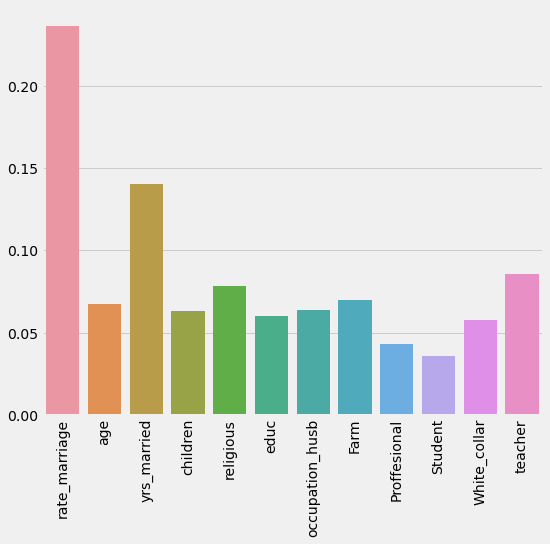

In [20]:
#Feature selection by the xgboost
import xgboost
xgb=xgboost.XGBClassifier()
xgb.fit(x,y)

feature=xgb.feature_importances_
columns=x.columns

for i,j in enumerate(feature):
    print(columns[i],'---->',j)

plt.figure(figsize=(8,7))
ax=sns.barplot([x for x in range(len(feature))],feature)
ax.set_xticklabels(x.columns,rotation=90)
plt.show()

In [42]:
#Split the data in to train and test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [43]:
#Feature transformation
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score,KFold,ShuffleSplit
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [45]:
def models(x,y,x_test,y_test):
    #Logistic Regression
    log=LogisticRegression()
    log.fit(x,y)
    
    #DecisionTreeClassifier
    tree=DecisionTreeClassifier()
    tree.fit(x,y)
    
    #RandomForestClassifer
    random=RandomForestClassifier(n_estimators=1000)
    random.fit(x,y)
    
    #Support vector classifer
    svm=SVC()
    svm.fit(x,y)
    
    #KnearestNeighborClassifier
    knn=KNeighborsClassifier(n_neighbors=7)
    knn.fit(x,y)
    
    
    #predictions
    log_pred=log.predict(x_test)
    tree_pred=tree.predict(x_test)
    random_pred=random.predict(x_test)
    svm_pred=svm.predict(x_test)
    knn_pred=knn.predict(x_test)
    
    
    #Get an accuracy
    print('Logistc Regression')
    lg=print('Accuracy:',accuracy_score(y_test,log_pred),'\n')
    print(classification_report(y_test,log_pred))
    print(confusion_matrix(y_test,log_pred))
    print('*'*30)
    print('DecisionTreeClassifer')
    tr=print('Accuracy:',accuracy_score(y_test,tree_pred),'\n')
    print(classification_report(y_test,tree_pred))
    print(confusion_matrix(y_test,tree_pred))
    print('*'*30)
    print('Random Forest Classifer')
    rd=print('Accuracy:',accuracy_score(y_test,random_pred),'\n')
    print(classification_report(y_test,random_pred))
    print(confusion_matrix(y_test,random_pred))
    print('*'*30)
    print('Support vector machine')
    sv=print('Accuracy:',accuracy_score(y_test,svm_pred),'\n')
    print(classification_report(y_test,svm_pred))
    print(confusion_matrix(y_test,svm_pred))
    print('*'*30)
    print('KnearestNeighborsClassifier')
    kn=print('Accuracy:',accuracy_score(y_test,knn_pred),'\n')
    print(classification_report(y_test,knn_pred))
    print(confusion_matrix(y_test,knn_pred))
    return lg,tr,rd,sv,kn

In [46]:
models(x_train,y_train,x_test,y_test)

Logistc Regression
Accuracy: 0.7425431711145997 

              precision    recall  f1-score   support

           0       0.77      0.91      0.83       885
           1       0.63      0.37      0.47       389

    accuracy                           0.74      1274
   macro avg       0.70      0.64      0.65      1274
weighted avg       0.73      0.74      0.72      1274

[[802  83]
 [245 144]]
******************************
DecisionTreeClassifer
Accuracy: 0.6397174254317112 

              precision    recall  f1-score   support

           0       0.73      0.77      0.75       885
           1       0.40      0.35      0.37       389

    accuracy                           0.64      1274
   macro avg       0.56      0.56      0.56      1274
weighted avg       0.63      0.64      0.63      1274

[[679 206]
 [253 136]]
******************************
Random Forest Classifer
Accuracy: 0.7001569858712716 

              precision    recall  f1-score   support

           0       0.76  

(None, None, None, None, None)

In [26]:
#Without scaling the features
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

#Model building
def models(x,y,x_test,y_test):
    #Logistic Regression
    log=LogisticRegression()
    log.fit(x,y)
    
    #DecisionTreeClassifier
    tree=DecisionTreeClassifier()
    tree.fit(x,y)
    
    #RandomForestClassifer
    random=RandomForestClassifier()
    random.fit(x,y)
    
    #Support vector classifer
    svm=SVC()
    svm.fit(x,y)
    
    #KnearestNeighborClassifier
    knn=KNeighborsClassifier()
    knn.fit(x,y)
    
    
    #predictions
    log_pred=log.predict(x_test)
    tree_pred=tree.predict(x_test)
    random_pred=random.predict(x_test)
    svm_pred=svm.predict(x_test)
    knn_pred=knn.predict(x_test)
    
    
    #Get an accuracy
    print('Logistc Regression')
    lg=print('Accuracy:',accuracy_score(y_test,log_pred),'\n')
    print(classification_report(y_test,log_pred))
    print(confusion_matrix(y_test,log_pred))
    print('*'*30)
    print('DecisionTreeClassifer')
    tr=print('Accuracy:',accuracy_score(y_test,tree_pred),'\n')
    print(classification_report(y_test,tree_pred))
    print(confusion_matrix(y_test,tree_pred))
    print('*'*30)
    print('Random Forest Classifer')
    rd=print('Accuracy:',accuracy_score(y_test,random_pred),'\n')
    print(classification_report(y_test,random_pred))
    print(confusion_matrix(y_test,random_pred))
    print('*'*30)
    print('Support vector machine')
    sv=print('Accuracy:',accuracy_score(y_test,svm_pred),'\n')
    print(classification_report(y_test,svm_pred))
    print(confusion_matrix(y_test,svm_pred))
    print('*'*30)
    print('KnearestNeighborsClassifier')
    kn=print('Accuracy:',accuracy_score(y_test,knn_pred),'\n')
    print(classification_report(y_test,knn_pred))
    print(confusion_matrix(y_test,knn_pred))
    return lg,tr,rd,sv,kn

In [27]:
models(x_train,y_train,x_test,y_test)

C:\Users\Praneeth\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistc Regression
Accuracy: 0.7433281004709577 

              precision    recall  f1-score   support

           0       0.77      0.91      0.83       885
           1       0.64      0.37      0.47       389

    accuracy                           0.74      1274
   macro avg       0.70      0.64      0.65      1274
weighted avg       0.73      0.74      0.72      1274

[[804  81]
 [246 143]]
******************************
DecisionTreeClassifer
Accuracy: 0.641287284144427 

              precision    recall  f1-score   support

           0       0.73      0.76      0.75       885
           1       0.41      0.37      0.39       389

    accuracy                           0.64      1274
   macro avg       0.57      0.57      0.57      1274
weighted avg       0.63      0.64      0.64      1274

[[672 213]
 [244 145]]
******************************
Random Forest Classifer
Accuracy: 0.6946624803767661 

              precision    recall  f1-score   support

           0       0.76   

(None, None, None, None, None)

#### Principle component analysis
PCA is a technique which is used to reduce the dimensions of a features in order to avoid overfitting, If we train a model with high dimensions gives a low bias & High variance. In order to reduce the error we use a technique called PCA(Principle component analysis) Here we can set n_components means the dimensions we want. Before we apply PCA to model we need to scale down thw all values in the features by using StandaradScaler or MinMaxScaler

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15,random_state=0)
scaled_x=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [29]:
#Dimensionality reduction
from sklearn.decomposition import PCA
pca=PCA(n_components=5)
x_train_1=pca.fit_transform(scaled_x)
x_test_1=pca.transform(x_test)

In [30]:
#explaned_variance
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.22183183, 0.1697148 , 0.11466876, 0.09133407, 0.08778694])

In [31]:
def models(x,y,x_test,y_test):
    #Logistic Regression
    log=LogisticRegression()
    log.fit(x,y)
    
    #DecisionTreeClassifier
    tree=DecisionTreeClassifier()
    tree.fit(x,y)
    
    #RandomForestClassifer
    random=RandomForestClassifier()
    random.fit(x,y)
    
    #Support vector classifer
    svm=SVC()
    svm.fit(x,y)
    
    #KnearestNeighborClassifier
    knn=KNeighborsClassifier()
    knn.fit(x,y)
    
    
    #predictions
    log_pred=log.predict(x_test)
    tree_pred=tree.predict(x_test)
    random_pred=random.predict(x_test)
    svm_pred=svm.predict(x_test)
    knn_pred=knn.predict(x_test)
    
    
    #Get an accuracy
    print('Logistc Regression')
    lg=print('Accuracy:',accuracy_score(y_test,log_pred),'\n')
    print(classification_report(y_test,log_pred))
    print(confusion_matrix(y_test,log_pred))
    print('*'*30)
    print('DecisionTreeClassifer')
    tr=print('Accuracy:',accuracy_score(y_test,tree_pred),'\n')
    print(classification_report(y_test,tree_pred))
    print(confusion_matrix(y_test,tree_pred))
    print('*'*30)
    print('Random Forest Classifer')
    rd=print('Accuracy:',accuracy_score(y_test,random_pred),'\n')
    print(classification_report(y_test,random_pred))
    print(confusion_matrix(y_test,random_pred))
    print('*'*30)
    print('Support vector machine')
    sv=print('Accuracy:',accuracy_score(y_test,svm_pred),'\n')
    print(classification_report(y_test,svm_pred))
    print(confusion_matrix(y_test,svm_pred))
    print('*'*30)
    print('KnearestNeighborsClassifier')
    kn=print('Accuracy:',accuracy_score(y_test,knn_pred),'\n')
    print(classification_report(y_test,knn_pred))
    print(confusion_matrix(y_test,knn_pred))
    return lg,tr,rd,sv,kn

In [32]:
models(x_train_1,y_train,x_test_1,y_test)

Logistc Regression
Accuracy: 0.7287958115183246 

              precision    recall  f1-score   support

           0       0.75      0.91      0.82       661
           1       0.61      0.33      0.43       294

    accuracy                           0.73       955
   macro avg       0.68      0.62      0.63       955
weighted avg       0.71      0.73      0.70       955

[[599  62]
 [197  97]]
******************************
DecisionTreeClassifer
Accuracy: 0.6534031413612565 

              precision    recall  f1-score   support

           0       0.74      0.78      0.76       661
           1       0.43      0.37      0.40       294

    accuracy                           0.65       955
   macro avg       0.58      0.57      0.58       955
weighted avg       0.64      0.65      0.65       955

[[515 146]
 [185 109]]
******************************
Random Forest Classifer
Accuracy: 0.6900523560209424 

              precision    recall  f1-score   support

           0       0.75  

(None, None, None, None, None)

### Hyper Parameter tuning

In [47]:
#model
log_1=LogisticRegression()

#parameters
dicts={'penalty':['l1','l2','elasticnet'],
      'C':[1.0,2.0,3.0,4.0,5.0],
      'fit_intercept':[True,False],
      'solver':['lbfgs','liblinear'],
      'multi_class':['auto','ovr','multinomial'],
      'max_iter':[100,150,200,250]}
dicts

{'penalty': ['l1', 'l2', 'elasticnet'],
 'C': [1.0, 2.0, 3.0, 4.0, 5.0],
 'fit_intercept': [True, False],
 'solver': ['lbfgs', 'liblinear'],
 'multi_class': ['auto', 'ovr', 'multinomial'],
 'max_iter': [100, 150, 200, 250]}

In [48]:
hyp_log=RandomizedSearchCV(log_1,param_distributions=dicts,n_iter=50,cv=10,scoring='roc_auc',verbose=3,n_jobs=-1)

In [49]:
hyp_log.fit(x_train,y_train)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.4s finished


RandomizedSearchCV(cv=10, estimator=LogisticRegression(), n_iter=50, n_jobs=-1,
                   param_distributions={'C': [1.0, 2.0, 3.0, 4.0, 5.0],
                                        'fit_intercept': [True, False],
                                        'max_iter': [100, 150, 200, 250],
                                        'multi_class': ['auto', 'ovr',
                                                        'multinomial'],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['lbfgs', 'liblinear']},
                   scoring='roc_auc', verbose=3)

In [50]:
hyp_log.best_estimator_

LogisticRegression(fit_intercept=False, max_iter=200, multi_class='ovr',
                   penalty='l1', solver='liblinear')

In [51]:
hyp_log.best_score_

0.7426019815750745

In [52]:
hyp_log.best_params_

{'solver': 'liblinear',
 'penalty': 'l1',
 'multi_class': 'ovr',
 'max_iter': 200,
 'fit_intercept': False,
 'C': 1.0}

In [53]:
hyp_model=LogisticRegression(C=2.0, fit_intercept=False, max_iter=150, multi_class='ovr',
                   penalty='l1', solver='liblinear')
hyp_model.fit(x_train,y_train)

LogisticRegression(C=2.0, fit_intercept=False, max_iter=150, multi_class='ovr',
                   penalty='l1', solver='liblinear')

In [54]:
#predict on the test data
hyp_model_pred=hyp_model.predict(x_test)
hyp_model_pred[:10]

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 1])

In [55]:
#get an accuracy
print('Accuracy_score: ',accuracy_score(y_test,hyp_model_pred))
print('Classification_report: ',classification_report(y_test,hyp_model_pred))
print(confusion_matrix(y_test,hyp_model_pred))

Accuracy_score:  0.685243328100471
Classification_report:                precision    recall  f1-score   support

           0       0.84      0.68      0.75       885
           1       0.49      0.70      0.58       389

    accuracy                           0.69      1274
   macro avg       0.66      0.69      0.66      1274
weighted avg       0.73      0.69      0.70      1274

[[601 284]
 [117 272]]


### Conclusion

As we applied so many machine learning algorithems in our data to get an accurate result on the test data. The models we are applies __Logistic Regression_,__DecisionTreeClassifier__,__Support vector machine__,__Random Forest Classifier__,__Kneighbors Classifier__ on the data. From those results we can understand the __Logistic Regression__,__SVM__ Gives a better accuracy compared to the __other__ algorithems. So we can consider logistic regression is the best way classify the results in our usecases. Also, we do some __Hyper parameter optimization__ on the logistic regression but it does'nt reach our mark. also, we perform scaling operations, feature selection techinques by the __xg boost__, and we apply the PCA to the model to reduce the overfitting.